# PSO

In [18]:
# === Config Parameters (from PSO) ===
filepath = './testDaily.csv'
window_sma = int(round(pso_best_pos[0]))
window_ema = int(round(pso_best_pos[1]))
window_lma = int(round(pso_best_pos[2]))
ema_alpha = float(np.clip(pso_best_pos[3], 1e-10, 1.0))
threshold = float(np.clip(pso_best_pos[4], -100, 100))
w1 = float(np.clip(pso_best_pos[5], -100, 100))
w2 = float(np.clip(pso_best_pos[6], -100, 100))
w3 = float(np.clip(pso_best_pos[7], -100, 100))
w4 = float(np.clip(pso_best_pos[8], -100, 100))
w5 = float(np.clip(pso_best_pos[9], -100, 100))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()

# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()


# PSO-SA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()

# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()


# Artificial Bee Colony

In [16]:
# === Config Parameters (from ABC) ===
filepath = './testDaily.csv'
window_sma = int(round(abc_best_pos[0]))
window_ema = int(round(abc_best_pos[1]))
window_lma = int(round(abc_best_pos[2]))
ema_alpha = float(np.clip(abc_best_pos[3], 1e-10, 1.0))
threshold = float(np.clip(abc_best_pos[4], -100, 100))
w1 = float(np.clip(abc_best_pos[5], -100, 100))
w2 = float(np.clip(abc_best_pos[6], -100, 100))
w3 = float(np.clip(abc_best_pos[7], -100, 100))
w4 = float(np.clip(abc_best_pos[8], -100, 100))
w5 = float(np.clip(abc_best_pos[9], -100, 100))


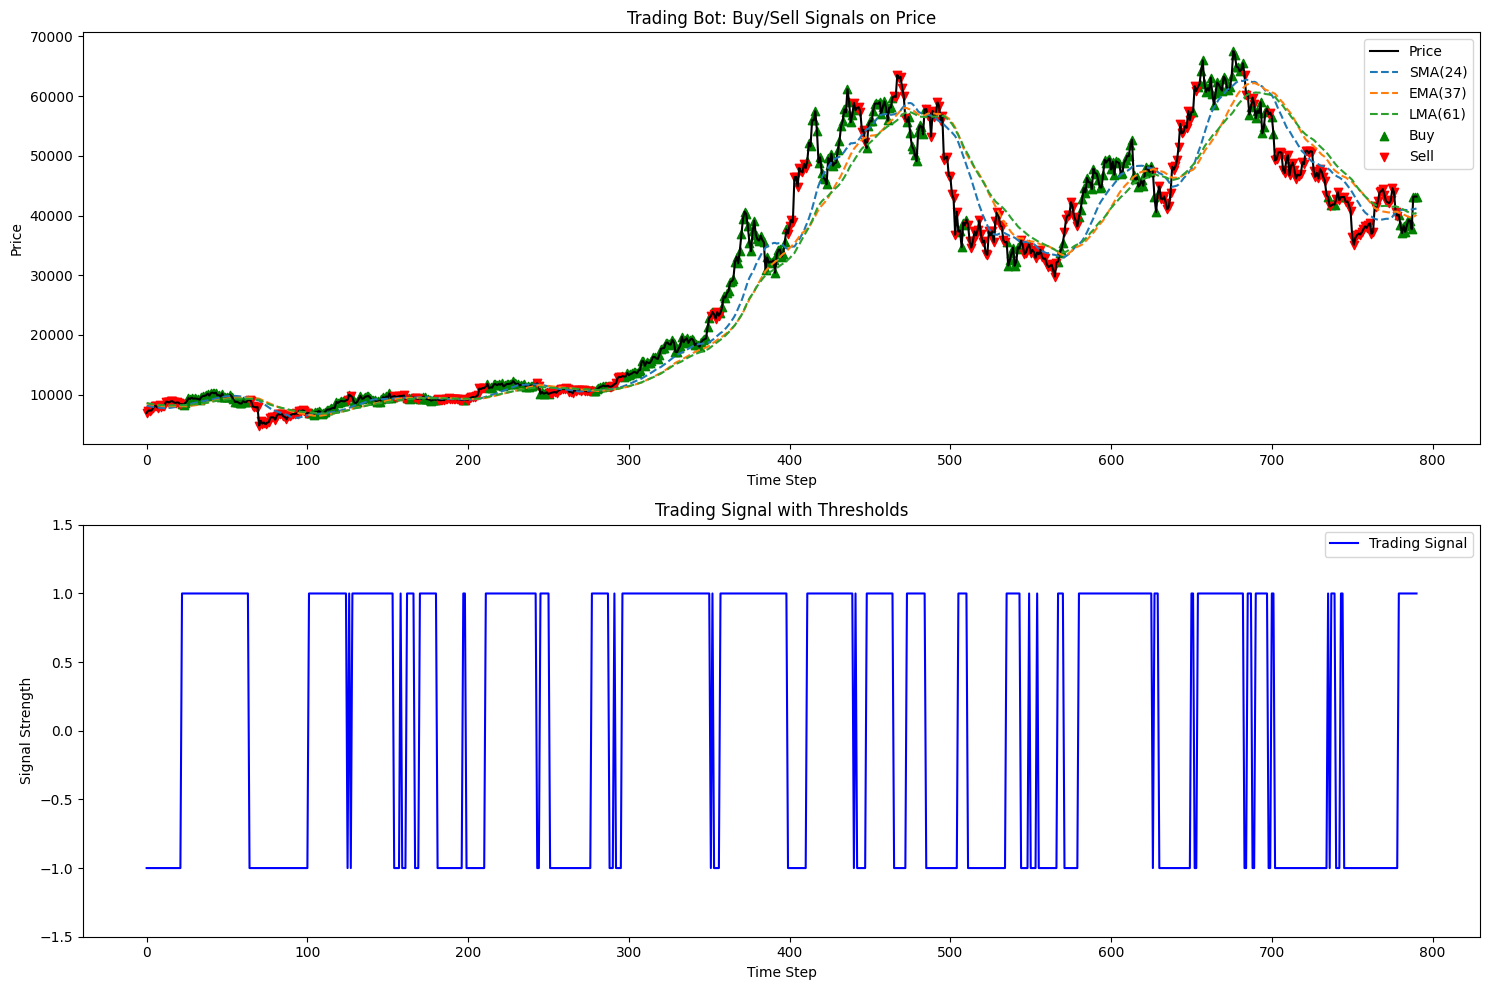

In [19]:
import matplotlib.pyplot as plt
import numpy as np

from data_processors import TradingDataProcessor
from data_processors import DataLoader
from trading_bot import TradingBotInstance  # Adjust import path as needed


def collect_momentum(loader):
    momentum = []
    while True:
        step_data = loader.step()
        if step_data is None:
            break
        # Extract only momentum values
        sma_mom, ema_mom, lma_mom = step_data[-3:]
        momentum.append((sma_mom, ema_mom, lma_mom))
    return np.array(momentum)



# === Prepare Data ===
processor = TradingDataProcessor(filepath)
prices = processor.closing_prices
sma = processor.get_sma(window_sma)
ema = processor.get_ema(window_ema, alpha=ema_alpha)
lma = processor.get_lma(window_lma)

# === Prepare DataLoader and get Momentum ===
loader_for_momentum = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
momentum = collect_momentum(loader_for_momentum)
sma_mom = momentum[:, 0]
ema_mom = momentum[:, 1]
lma_mom = momentum[:, 2]

# === Run Bot for Buy/Sell decisions and signal ===
loader_for_bot = DataLoader(filepath, window_sma, window_ema, window_lma, ema_alpha)
bot = TradingBotInstance(
    dataset_path=filepath,
    window_sma=window_sma,
    window_ema=window_ema,
    window_lma=window_lma,
    ema_alpha=ema_alpha,
    threshold=threshold,
    w1=w1, w2=w2, w3=w3, w4=w4, w5=w5
)

# Re-implement signal tracking
signals = []
prices_trimmed = []
buy_signals = []
sell_signals = []
bot.current_signal = -1

while True:
    step_data = loader_for_bot.step()
    if step_data is None:
        break
    sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val = step_data
    signal = bot._trading_signal(sma_val, ema_val, lma_val, sma_mom_val, ema_mom_val, lma_mom_val)
    signals.append(signal)
    price = loader_for_bot.get_price()
    prices_trimmed.append(price)

    if signal == 1:
        buy_signals.append(price)
        sell_signals.append(np.nan)
    elif signal == -1:
        sell_signals.append(price)
        buy_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)

# === Plotting ===
plt.figure(figsize=(15, 10))

# --- Price & Moving Averages ---
plt.subplot(2, 1, 1)
plt.plot(prices_trimmed, label="Price", color='black')
plt.plot(sma, label=f"SMA({window_sma})", linestyle='--')
plt.plot(ema, label=f"EMA({window_ema})", linestyle='--')
plt.plot(lma, label=f"LMA({window_lma})", linestyle='--')
plt.scatter(range(len(buy_signals)), buy_signals, label='Buy', color='green', marker='^')
plt.scatter(range(len(sell_signals)), sell_signals, label='Sell', color='red', marker='v')
plt.title("Trading Bot: Buy/Sell Signals on Price")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()

# --- Signal with Thresholds ---
plt.subplot(2, 1, 2)
signal_array = np.array(signals)
plt.plot(signal_array, label="Trading Signal", color='blue')
plt.ylim(-1.5, 1.5)
plt.title("Trading Signal with Thresholds")
plt.xlabel("Time Step")
plt.ylabel("Signal Strength")
plt.legend()

plt.tight_layout()
plt.show()


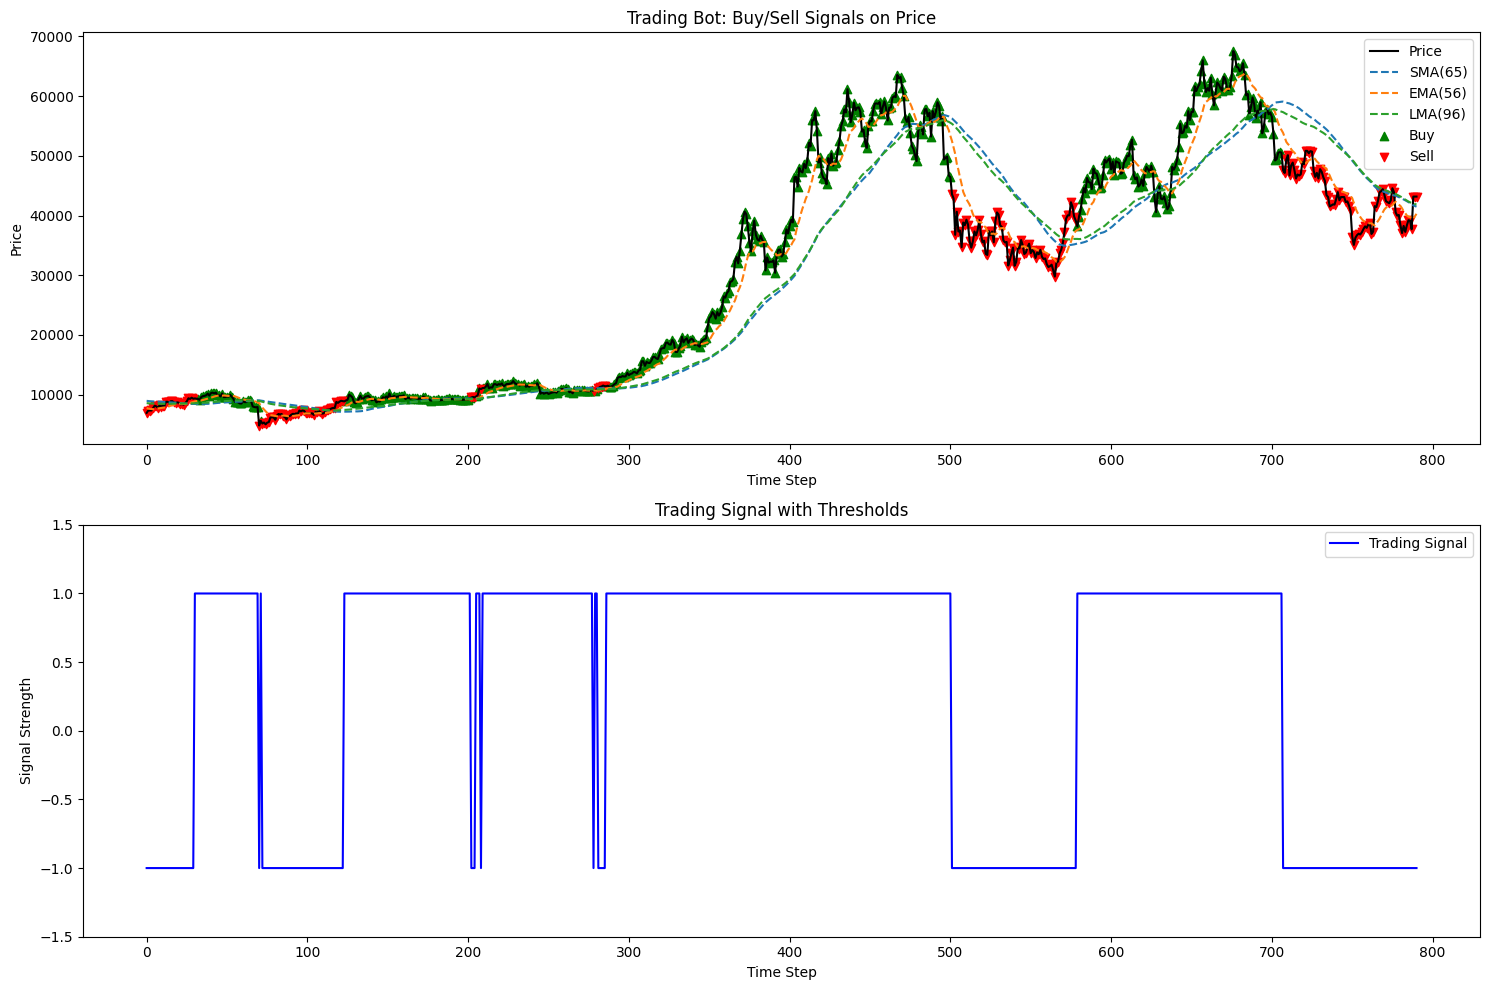